## CS441: Applied ML - HW 1

### Parts 1-2: MNIST

Include all the code for generating MNIST results below

In [48]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats


def load_mnist():
  '''
  Loads, reshapes, and normalizes the data
  '''
  (x_train, y_train), (x_test, y_test) = mnist.load_data() # loads MNIST data
  x_train = x_train[::-1]
  y_train = y_train[::-1]
  x_train = np.reshape(x_train, (len(x_train), 28*28))  # reformat to 784-d vectors
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval  # normalize values to range from 0 to 1
  x_test = x_test/maxval
  return (x_train, y_train), (x_test, y_test)

def display_mnist(x, subplot_rows=1, subplot_cols=1):
  '''
  Displays one or more examples in a row or a grid
  '''
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

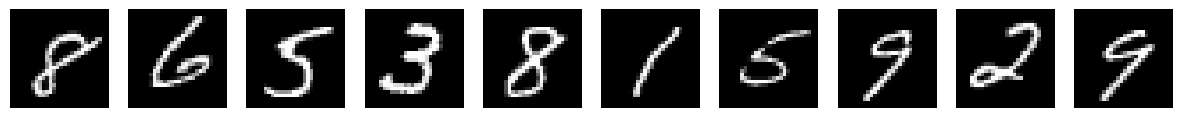

Total size: train=60000, test =10000


In [49]:
# example of using MNIST load and display  functions
(x_train, y_train), (x_test, y_test) = load_mnist()
display_mnist(x_train[:10],1,10)
print('Total size: train={}, test ={}'.format(len(x_train), len(x_test)))

1. Retrieval, Clustering, and NN Classification

**Retrieval**: Implement the function get_nearest using Euclidean (L2) distance. Check that get_nearest(x_test[0], x_train) returns i=6156. Report the index of the closest example in x_train to x_test[1].

In [50]:
# Retrieval

def get_nearest(X_query, X):
  minimum_distance = np.Inf
  index = -1
  for i in range(len(X)):
    dist = np.linalg.norm(X[i] - X_query)
    if dist < minimum_distance:
      minimum_distance = dist
      index = i
  return index
  ''' Return the index of the sample in X that is closest to X_query according
      to L2 distance '''
  # TO DO

j = get_nearest(x_test[0], x_train)
print(j)
j = get_nearest(x_test[1], x_train)
print(j)

6156
31117


**K-means**: Using your get_nearest function, write a function kmeans that iteratively assigns each data point to the nearest cluster center.  Apply it to only the first 1000 examples, x_train[:1000]. Try this with K = 10 and K = 30, and display the cluster centers after each iteration. Include the displays from after the 1st and 10th iteration for K=30 in your report. See the note in the assignment if your cluster centers do not seem to be changing.


for K = 30
For K = 30 after iteration 1


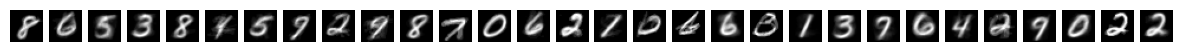

For K = 30 after iteration 10


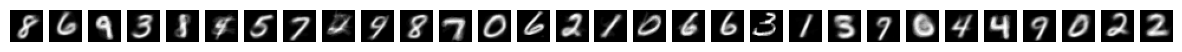

for K = 10
For K = 10 after iteration 1


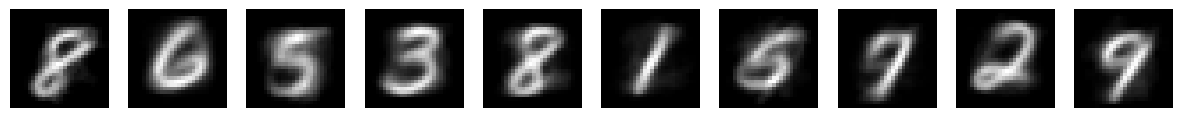

For K = 10 after iteration 10


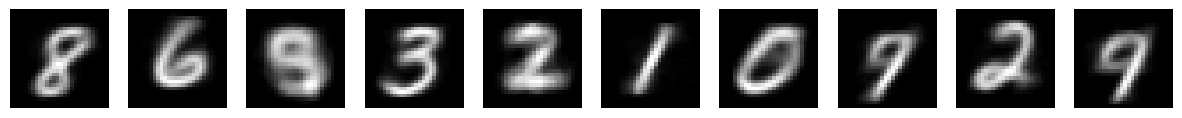

In [52]:
# K-means

def kmeans(X, K, niter=10):
  # min_, max_ = np.min(X, axis=0), np.max(X, axis=0)
  # centroid_index = []
  centroids = X[:K].copy()
  # for i in range(K):
    # index = np.random.randint(len(X));
    # centroid_index.append(index)
    # centroids.append(X[index])
  # centroids = np.array(centroids)

  # display_mnist(centroids[:K], 1, K)
  final_cluster_index = []
  for i in range(niter):
    cluster_index = []
    for j in range(len(X)): #
      # index = get_nearest(X[j], centroids);
      # print(index)
      cluster_index.append(get_nearest(X[j], centroids))

    new_centroid = []
    for j in range(K):
      cluster = []
      for l in range(len(X)):
        if j == cluster_index[l] :
          cluster.append(X[l])
      new_centroid.append(np.mean(cluster, axis=0))

    # are_equal = sorted(list1) == sorted(list2)
    # if(np.array_equal(np.array(centroids), np.array(new_centroid))):
    #   break

    centroids = new_centroid
    # print(centroids)
    if (i == 0 or i == 9):
      print("For K = " + str(K) + " after iteration " + str(i+1))
      display_mnist(centroids[:K], 1, K)
      # plot_clusters(X, centroids, cluster_index, K, iteration=i+1)

  final_cluster_index = cluster_index

  # return centroids, final_cluster_index

  '''
  Starting with the first K samples in X as cluster centers, iteratively assign each
  point to the nearest cluster and compute the mean of each cluster.
  Input: X[i] is the ith sample, K is the number of clusters, niter is the number of iterations
  Output: K cluster centers
  '''
  # TO DO -- implement kmeans and add code to display cluster centers at each iteration

K=30
print("for K = " + str(K))
kmeans(x_train[:1000], K)

K=10
print("for K = " + str(K))
kmeans(x_train[:1000], K)



**1-NN**: Now, use your get_nearest function to perform 1-nearest neighbor. For each test sample, find the index of the closest sample in the training data to predict its label. To check your method, calculate the error for the first 100 test samples using only the first 1,000 training samples; the error should be 19%. Report the percent error for the first 100 test samples using the first 10,000 training samples.

In [55]:
# 1-NN

# TO DO

def nearest_neaighbour_classifier(x_train, y_train, x_test):
  y_test = []
  for i in np.arange(len(x_test)):
    y_test.append(y_train[get_nearest(x_test[i], x_train)])
  return np.array(y_test)

trained_y_test = nearest_neaighbour_classifier(x_train[:1000], y_train[:1000], x_test[:100])
wrong_values = 0
for i in range(len(trained_y_test)):
  if(trained_y_test[i] != y_test[i]):
    wrong_values += 1
sample = 100
error = (wrong_values/ sample) * 100
print(error)

19.0


In [56]:
trained_y_test = nearest_neaighbour_classifier(x_train[:10000], y_train[:10000], x_test[:100])
wrong_values = 0
for i in range(len(trained_y_test)):
  if(trained_y_test[i] != y_test[i]):
    wrong_values += 1
sample = 100
error = (wrong_values/ sample) * 100
print(error)

7.000000000000001


2. Make it fast

In [57]:
# install libraries you need for part 2
!apt install libomp-dev
!pip install faiss-cpu
import faiss
import time

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libomp-dev is already the newest version (1:14.0-55~exp2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


**Retrieval**: Exact search can be performed using the code below.
```
index = faiss.IndexFlatL2(X.shape[1])  # set for exact search
index.add(x_train) # add the data
dist, idx = index.search(x_test[:2],1) # returns index and sq err for each sample
```
Check that idx matches your retrieved indices from Part 1.  

In [58]:
# retrieval
index = faiss.IndexFlatL2(x_train.shape[1])  # set for exact search
index.add(x_train) # add the data
dist, idx = index.search(x_test[:2],1) # returns index and sq err for each sample
print(dist)
print(idx)
# TO DO (check that you're using FAISS correctly)

[[ 7.0398464]
 [20.79831  ]]
[[ 6156]
 [31117]]


**K-means**: Complete fast_kmeans using FAISS for the retrieval instead of your get_nearest function. In each iteration, create a new index, add the cluster centers, and find the nearest center to all samples.  Once it's working, disable any print or display functions inside the kmeans loop.

Record the root mean squared error (RMSE) at the start of each iteration, and plot the RMSE for each iteration for K=10, K=30, and K=100 when clustering the full training set with 20 iterations.

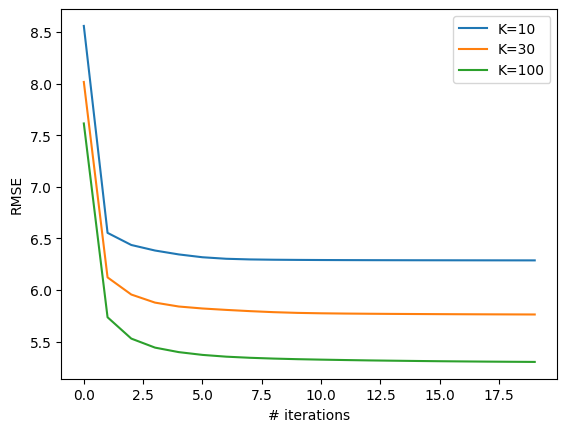

In [59]:
# K-means

def kmeans_fast(X, K, niter=20):
  '''
  Starting with the first K samples in X as cluster centers, iteratively assign each
  point to the nearest cluster using faiss and compute the mean of each cluster.
  Input: X[i] is the ith sample, K is the number of clusters, niter is the number of iterations
  Output: K cluster centers
  '''
  centroids = X[:K].copy()
  rmse_list = []
  # for i in range(K):
  #   index = np.random.randint(len(X));
  #   centroids.append(X[index])


  final_cluster_index = []
  for i in range(niter):
    index = faiss.IndexFlatL2(X.shape[1])
    index.add(np.array(centroids))
    temp_dist, cluster_index = index.search(X,1)

    # print(cluster_index)
    # for j in range(len(X)):
    #   cluster_index.append(get_nearest(X[j], centroids))

    # temp_rmse_k = []
    new_centroid = []
    for j in range(K):
      cluster = []
      # cluster_dist = []
      for l in range(len(X)):
        if j == cluster_index[l] :
          cluster.append(X[l])
          # cluster_dist.append(temp_dist[l])
      new_centroid.append(np.mean(cluster, axis=0))
      # temp_rmse = 0
      # for dist in cluster_dist:
      #   temp_rmse += dist*dist
      # temp_rmse = np.sqrt(temp_rmse/len(cluster_dist))
      # temp_rmse_k.append(temp_rmse)
    t = 0
    # for dist in temp_dist:
    #   t += dist*dist
    rmse_list.append(np.sqrt(np.mean(temp_dist)))
    # if(centroids == new_centroid):
    #   break

    centroids = new_centroid
    # print(centroids)
    # if (i == 0 or i == 9):
      # print("For K = " + str(K) + " after iteration " + str(i+1))
      # display_mnist(centroids[:K], 1, K)

  final_cluster_index = cluster_index


  return centroids, rmse_list
  # TO DO (you can base this on part 1, but use FAISS for search)
  # if you include display code, you need to re-organize the plotting code below

K=10
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=10')

K=30
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=30')

K=100
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=100')
plt.legend(), plt.ylabel('RMSE'), plt.xlabel('# iterations')
plt.show()


**1-NN**: Use FAISS to evaluate 1-NN on the full training and test sets.  Try this with both the exact search and LSH approximate search.  The only difference is how you set up the index.  

For LSH, use:
```
dim = X.shape[1]
index = faiss.IndexLSH(dim, dim)
```

Evaluate 1-NN using each search method, while varying the number of training samples: s in [100,1000, 10000, 60000].  In each case, use x_train[:s] as the train set.  Plot number of samples vs. percent error on a semilogx plot for both exact and LSH (on the same plot).  Also, record timings using `time.time()` and plot samples vs. time on a semilogx plot.

51.0 error found when sample was 100 and wrong values were 51with time required for execution 0.002027750015258789
19.0 error found when sample was 1000 and wrong values were 19with time required for execution 0.009075641632080078
7.000000000000001 error found when sample was 10000 and wrong values were 7with time required for execution 0.1337108612060547
0.0 error found when sample was 60000 and wrong values were 0with time required for execution 1.5055036544799805
55.00000000000001 error found when sample was 100 and wrong values were 55 with time required for execution 0.1817176342010498
19.0 error found when sample was 1000 and wrong values were 19 with time required for execution 0.17548036575317383
4.0 error found when sample was 10000 and wrong values were 4 with time required for execution 0.3151075839996338
1.0 error found when sample was 60000 and wrong values were 1 with time required for execution 1.7116515636444092


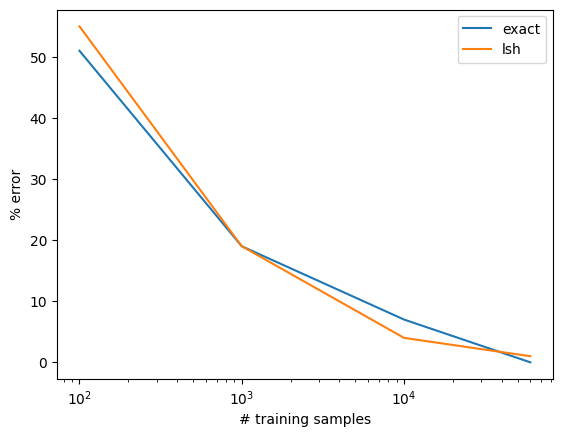

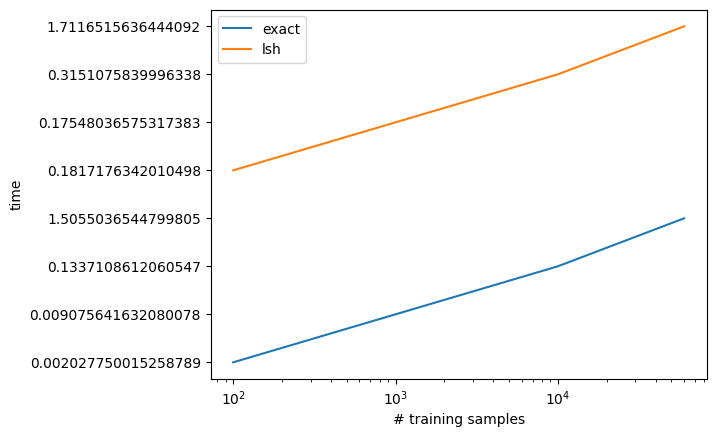

In [68]:
# 1-NN


def nearest_neaighbour_classifier_Faiss(x_train, y_train, x_test):
  index = faiss.IndexFlatL2(x_train.shape[1])  # set for exact search
  index.add(x_train)
  dist, idx = index.search(x_test,1)
  # print(idx)
  y_test = []
  for i in np.arange(len(x_test)):
    y_test.append(y_train[idx[i]])
  return np.array(y_test)

def nearest_neaighbour_classifier_Faiss_LSH(x_train, y_train, x_test):
  dim = x_train.shape[1]
  index = faiss.IndexLSH(dim, dim)
  index.add(x_train)
  dist, idx = index.search(x_test,1)
  # print(idx)
  y_test = []
  for i in np.arange(len(x_test)):
    y_test.append(y_train[idx[i]])
  return np.array(y_test)

nsample = [100, 1000, 10000, 60000]
acc_exact = []
timing_exact = []
for s in nsample:
  start_time = time.time()
  trained_y_test = nearest_neaighbour_classifier_Faiss(x_train[:s], y_train[:s], x_test[:100])
  # end_time = time.time()
  # timing_exact.append((str(end_time - start_time)))
  wrong_values = 0
  for i in range(len(trained_y_test)):
    if(trained_y_test[i] != y_test[i]):
      wrong_values += 1
  sample = 100
  error = (wrong_values/ sample) * 100
  acc_exact.append(error)
  end_time = time.time()
  timing_exact.append((str(end_time - start_time)))
  print(str(error) + " error found when sample was " + str(s) + " and wrong values were " + str(wrong_values) + "with time required for execution " + str(end_time - start_time))

acc_lsh = []
timing_lsh = []
for s in nsample:
  start_time = time.time()
  trained_y_test = nearest_neaighbour_classifier_Faiss_LSH(x_train[:s], y_train[:s], x_test[:100])
  # end_time = time.time()
  # timing_lsh.append(str(end_time - start_time))
  wrong_values = 0
  for i in range(len(trained_y_test)):
    if(trained_y_test[i] != y_test[i]):
      wrong_values += 1
  sample = 100
  error = (wrong_values/ sample) * 100
  acc_lsh.append(error)
  end_time = time.time()
  timing_lsh.append(str(end_time - start_time))
  print(str(error) + " error found when sample was " + str(s) + " and wrong values were " + str(wrong_values) + " with time required for execution " + str(end_time - start_time))

# TO DO
acc_exact = np.array(acc_exact)
acc_lsh = np.array(acc_lsh)
timing_exact = np.array(timing_exact)
timing_lsh = np.array(timing_lsh)

plt.semilogx(nsample, (acc_exact), label='exact')
plt.semilogx(nsample, (acc_lsh), label='lsh')
plt.legend(), plt.ylabel('% error'), plt.xlabel('# training samples')
plt.show()

plt.semilogx(nsample, timing_exact, label='exact')
plt.semilogx(nsample, timing_lsh, label='lsh')
plt.legend(), plt.ylabel('time'), plt.xlabel('# training samples')
plt.show()


In your report, indicate which label is most often confused with ‘3’ when using the full training set and exact search for 1-NN.  

In [69]:
# Confusion matrix
import sklearn as sns
from sklearn.metrics import confusion_matrix


In [70]:
timing_exact = []
start_time = time.time()
size = len(x_test)
trained_y_test = nearest_neaighbour_classifier_Faiss(x_train, y_train, x_test)
end_time = time.time()
timing_exact.append((str(end_time - start_time)))
wrong_values = 0
for i in range(size):
  if(trained_y_test[i] != y_test[i]):
    wrong_values += 1
error = (wrong_values/ size) * 100
# acc_exact.append(int(error))
print(str(error) + " error found when sample was " + str(s) + " and wrong values were " + str(wrong_values) + " with time required for execution " + str(end_time - start_time))

# TO DO


3.09 error found when sample was 60000 and wrong values were 309 with time required for execution 33.41194415092468


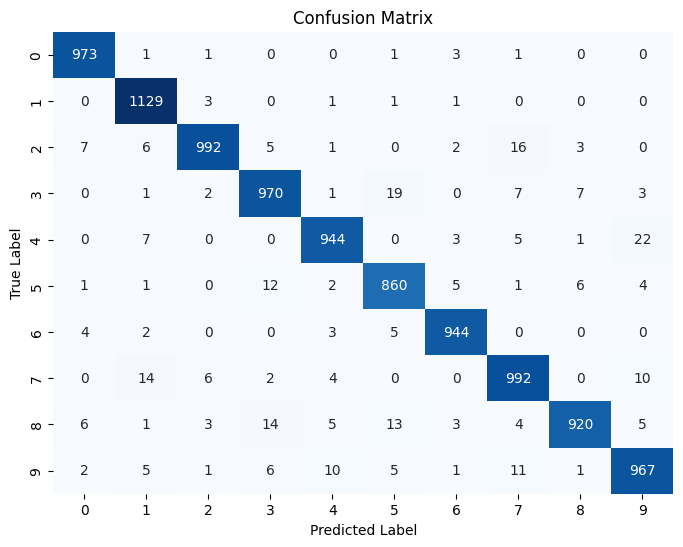

In [71]:
import seaborn as sns
cm = confusion_matrix(y_test, trained_y_test)

# Step 2: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

8 is mostly confused as 3

## Part 3: Temperature Regression

Include all your code used for part 3 in this section.  

In [72]:
from google.colab import files

uploaded = files.upload()

Saving temperature_data.npz to temperature_data.npz


In [73]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  # drive.mount('/content/drive')
  # datadir = "/content/drive/My Drive/CS441/24FA/hw1/"
  T = np.load('temperature_data.npz')
  xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target date
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()

# load_temp_data()
# plot_temps()


Feature 361: city = Cleveland, day= -1
Baseline - prediction using previous day: RMSE=3.460601246750482


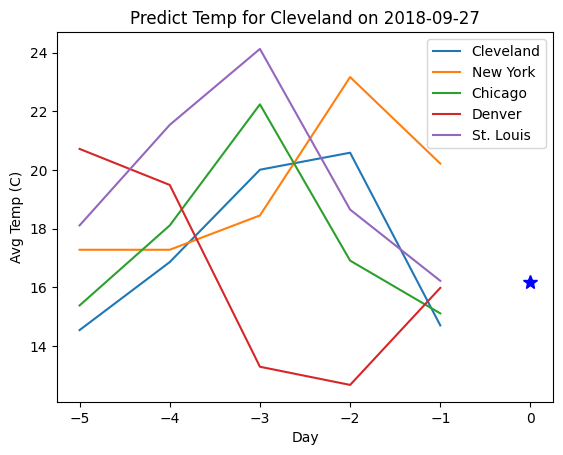

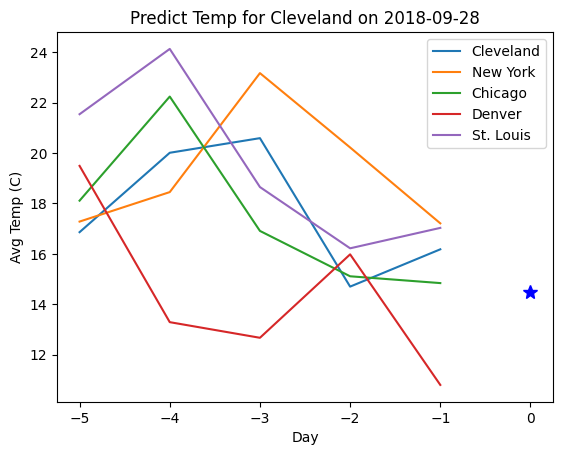

In [74]:
# load data (use xt and yt so that we aren't replacing the MNIST variables)
(xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()
''' Data format:
      x_train, y_train: features and target value for each training sample (used to fit model)
      x_val, y_val: features and target value for each validation sample (used to select hyperparameters, such as regularization and K)
      x_test, y_test: features and target value for each test sample (used to evaluate final performance)
      dates_xxx: date of the target value for the corresponding sample
      feature_to_city: maps from a feature number to the city
      feature_to_day: maps from a feature number to a day relative to the target value, e.g. -2 means two days before
      Note: 361 is the temperature of Cleveland on the previous day
'''
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))
baseline_rmse = np.sqrt(np.mean((yt_val[1:]-yt_val[:-1])**2)) # root mean squared error example
print('Baseline - prediction using previous day: RMSE={}'.format(baseline_rmse))

# plot first two x/y for val
plot_temps(xt_val[0], yt_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(xt_val[1], yt_val[1], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])



**KNN Regression**: Perform 5-NN regression, reporting RMSE for two variants:


1.   Original features
2.   Normalize the features by subtracting the previous day’s Cleveland temperature. I.e., if previous day’s Cleveland temperature is `c`, features are `X`, and value to predict is `y`, then predict `y_query-c = NN(X_query, X-c, y-c)`

For these experiments, train on (x_train, y_train) and test on (x_test, y_test). To validate your method, if you set `K=3`, you should get an RMSE of `3.314` for the original features.


In [77]:
# K-NN Regression

def regress_KNN(x_train, y_train, x_test, K=5):
  '''
  Predict the target value for each data point in X_tst using a
  K-nearest neighbor regressor based on (X_trn, y_trn), with L2 distance.
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test value
  '''
  # TO DO
  index = faiss.IndexFlatL2(x_train.shape[1])  # set for exact search
  index.add(x_train)
  dist, idx = index.search(x_test,K)
  res = np.zeros(x_test.shape[0])
  for i in np.arange(len(x_test)):
    ind = idx[i]
    values = []
    for j in range(K):
      values.append(y_train[ind[j]])
    # avg = np.mean(y_train[idx[i]])
    avg = np.mean(values)
    res[i] = avg
  return res


def normalize_features(x, y, fnum):
  ''' Normalize the features in x and y.
      For each data sample i:
        x2[i] = x[i]-x[i,fnum]
        y2[i] = y[i]-x[i,fnum]
  '''
  # TO DO
  temp_x = x.copy()
  temp_y = y.copy()

  for i in np.arange(len(x)):
    for j in np.arange(len(x[i])):
      temp_x[i,j] = x[i,j] - x[i,fnum]
    temp_y[i] = y[i] - x[i,fnum]

  return temp_x, temp_y



# print(len(xt_test))
# KNN with original features
K = 5
yt_pred = regress_KNN(xt_train, yt_train, xt_test,K)

rmse = np.sqrt(np.mean((yt_test - yt_pred) ** 2))
print("RMSE with original features: " + str(rmse))

# TO DO

# KNN with normalized features
fnum = 361 # previous day temp in Cleveland

norm_xt_train, norm_yt_train = normalize_features(xt_train, yt_train, fnum)
norm_xt_test, norm_yt_test = normalize_features(xt_test, yt_test, fnum)

norm_yt_pred = regress_KNN(norm_xt_train, norm_yt_train, norm_xt_test,K)
norm_rmse = np.sqrt(np.mean((norm_yt_test - norm_yt_pred) ** 2))
print("RMSE with normalized features: " + str(norm_rmse))


# print(len(feature_to_city))
# print(feature_to_city[:30])
# print(feature_to_day[:100])
# xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day





RMSE with original features: 3.1846378844060936
RMSE with normalized features: 2.8999927784510935


## Part 5: Stretch Goals
Include all your code used for part 5 in this section. You can copy-paste code from parts 1-3 if it is re-usable.

Compare K-NN on the MNIST classification for N=1, 3, 5, 11, 25. For these tests, use x_train[:50000] as a training set and x_train[50000:] as a validation set.  Report error on the validation set for all parameters. Then performance on the test set for the best parameter using the full training set.

When K is greater than 1, return the most common label of the nearest samples.  *If there 	is a tie, return the most common label with the closest sample.*

In [97]:
from collections import Counter
# Stretch: KNN classification (Select K)
def classifier_KNN(x_train, y_train, x_test, K=5):
  index = faiss.IndexFlatL2(x_train.shape[1])  # set for exact search
  index.add(x_train)
  dist, idx = index.search(x_test,K)
  res = np.zeros(x_test.shape[0])
  for i in np.arange(len(x_test)):
    ind = idx[i]
    values = []
    for j in range(K):
      values.append(y_train[ind[j]])
    # most_common_element = max(set(values), key=values.count)
    most_common_element = Counter(values).most_common(1)[0][0]
    # max_occurrences = values.count(most_common_element)
    res[i] = most_common_element
  return res

N = [1,3,5,11,25]
result = []
for i in N:
  trained_y_test = classifier_KNN(x_train[:50000], y_train[:50000], x_train[50000:],i)
  test_y_train = y_train[50000:]
  wrong_values = 0
  for j in range(len(trained_y_test)):
    if(trained_y_test[j] != test_y_train[j]):
      wrong_values += 1
  sample = len(test_y_train)
  error = (wrong_values/ sample) * 100
  print( "Error for K = " + str(i) + " is " + str(error) )
  result.append(error)


Error for K = 1 is 3.04
Error for K = 3 is 2.85
Error for K = 5 is 3.02
Error for K = 11 is 3.5000000000000004
Error for K = 25 is 4.3


In [100]:
best_result = min(result)
index_best_result = result.index(best_result)
best_N = N[index_best_result]
print("Best K is " + str(best_N))
trained_y_test = classifier_KNN(x_train, y_train, x_test,best_N)
wrong_values = 0
for i in range(len(trained_y_test)):
  if(trained_y_test[i] != y_test[i]):
    wrong_values += 1
sample = len(trained_y_test)
error = (wrong_values/ sample) * 100
print("Error for best K is " + str(error))

Best K is 3
Error for best K is 2.83


Compare K-NN on the temperature regression dataset for N=1, 3, 5, 11, 25 using both feature types. Report all results on the validation set, and then run the single best setting on the test set, using all training samples.

In [101]:
# Stretch: KNN regression (Select K)
# original features
N = [1,3,5,11,25]
result = []
for i in N:
  yt_pred = regress_KNN(xt_train, yt_train, xt_val, i)
  rmse = np.sqrt(np.mean((yt_val - yt_pred) ** 2))
  print("RMSE with original features: " + str(rmse) + " for N=" + str(i))
  result.append(rmse)


RMSE with original features: 4.334638061394246 for N=1
RMSE with original features: 3.2477289008934584 for N=3
RMSE with original features: 3.1233409141099897 for N=5
RMSE with original features: 3.0008389705781706 for N=11
RMSE with original features: 3.0281505759415834 for N=25


In [102]:
best_result = min(result)
index_best_result = result.index(best_result)
best_N = N[index_best_result]
print("Best K is " + str(best_N))
yt_pred = regress_KNN(xt_train, yt_train, xt_test, best_N)
rmse = np.sqrt(np.mean((yt_test - yt_pred) ** 2))
print("Best RMSE with original features " + str(rmse) + " for N=" + str(best_N) + " on test set")
result.append(rmse)

# yt_pred = regress_KNN(xt_train, yt_train, xt_test, 25)
# rmse = np.sqrt(np.mean((yt_test - yt_pred) ** 2))
# print("Best RMSE with original features " + str(rmse) + " for N=" + str(25) + " on test set")
# result.append(rmse)

Best K is 11
Best RMSE with original features 3.051018719912078 for N=11 on test set


In [90]:
# with Normalized features
norm_xt_train, norm_yt_train = normalize_features(xt_train, yt_train, fnum)
norm_xt_test, norm_yt_test = normalize_features(xt_test, yt_test, fnum)
norm_xt_val, norm_yt_val = normalize_features(xt_val, yt_val, fnum)

In [94]:
N = [1,3,5,11,25]
result = []
for i in N:
  norm_yt_pred = regress_KNN(norm_xt_train, norm_yt_train, norm_xt_val, i)
  rmse = np.sqrt(np.mean((norm_yt_val - norm_yt_pred) ** 2))
  print("RMSE with normalized features: " + str(rmse) + " for N=" + str(i))
  result.append(rmse)

RMSE with normalized features: 3.9396003204553005 for N=1
RMSE with normalized features: 3.2584032096117133 for N=3
RMSE with normalized features: 3.080241273239787 for N=5
RMSE with normalized features: 2.917200409530882 for N=11
RMSE with normalized features: 2.9156171084845264 for N=25


In [95]:
best_result = min(result)
index_best_result = result.index(best_result)
best_N = N[index_best_result]
print("Best K is " + str(best_N))
norm_yt_pred = regress_KNN(norm_xt_train, norm_yt_train, norm_xt_test, best_N)
rmse = np.sqrt(np.mean((norm_yt_test - norm_yt_pred) ** 2))
print("Best RMSE with normalized features " + str(rmse) + " for N=" + str(best_N) + "on test set")
result.append(rmse)

Best K is 25
Best RMSE with normalized features 2.771407614735461 for N=25on test set


Best of both is 2.77 for N=25 for Normalized feature

For K-means (on MNIST), does running with multiple re-runs or running a single run longer tend to provide lower RMSE?  For this, you can use the FAISS Kmeans function. Syntax is below.

```
 	kmeans = faiss.Kmeans(x_train.shape[1], 30, niter=10, nredo=1, seed=int(t))
  	kmeans.train(x_train)
	dist, idx = kmeans.index.search(x_train, 1)
	rmse = np.sqrt(np.sum(dist) / x_train.shape[0])
```
Compare (niter=10, nredo=5) vs. (niter=50, nredo=1) for K=30. Repeat this test five times and report the mean and standard deviation of the RMSE.
Compare (niter=4, nredo=5) vs. (niter=20, nredo=1) for K=30. Repeat this test five times and report the mean and standard deviation of the RMSE.


In [103]:
# Stretch: K-means (more iters vs redos)
K=30
test_1 = [[10,5],[50,1],[4,5],[20,1]]

for i in range(4):
  rmse_list = []
  for j in range(5):
    kmeans = faiss.Kmeans(x_train.shape[1], 30, niter=test_1[i][0], nredo=test_1[i][1], seed=int(j))
    kmeans.train(x_train)
    dist, idx = kmeans.index.search(x_train, 1)
    rmse = np.sqrt(np.sum(dist) / x_train.shape[0])
    rmse_list.append(rmse)
  mean = np.mean(rmse_list)
  std = np.std(rmse_list)
  print("For niter = " + str(test_1[i][0]) + " and nredo = " + str(test_1[i][1]) + " mean = " + str(mean) + " standard deviation = " + str(std))


For niter = 10 and nredo = 5 mean = 5.784186645165795 standard deviation = 0.008603519764584013
For niter = 50 and nredo = 1 mean = 5.779994090042927 standard deviation = 0.008189570735299564
For niter = 4 and nredo = 5 mean = 5.826142983081921 standard deviation = 0.006489017796755849
For niter = 20 and nredo = 1 mean = 5.786202065039114 standard deviation = 0.01073526294213036


In [ ]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# For use in Colab.  For local, just use jupyter nbconvert directly

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/My Drive/CS441/hw1" # @param {type:"string"}
NOTEBOOK_NAME = "CS441_HW1_Solution.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")